# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [41]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips[['tip_pct','net_bill']].head(5)

,tip_pct,net_bill
0,0.063204,15.98
1,0.191244,8.68
2,0.199886,17.51
3,0.162494,20.37
4,0.172069,20.98


In [42]:
df = pd.DataFrame({'y':tips['tip_pct'], 'x':tips['net_bill']})
df.head(5)

,y,x
0,0.063204,15.98
1,0.191244,8.68
2,0.199886,17.51
3,0.162494,20.37
4,0.172069,20.98


                                REGRESSÃO NORMAL                                
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.52e-06
Time:                        15:52:59   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

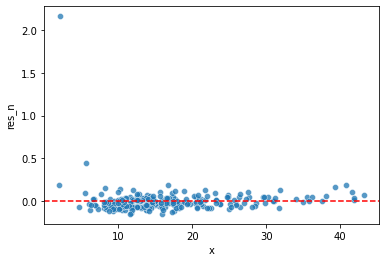

In [43]:
reg_n = smf.ols('y ~ x', data = df).fit()
tipo='REGRESSÃO NORMAL'
print(tipo.center(80))
print(reg_n.summary())
reg_n.summary()
df['res_n'] = reg_n.resid

sns.scatterplot(x = 'x', y = 'res_n', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                                FUNÇÃO LOGARITMO                                
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.62e-13
Time:                        15:53:04   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

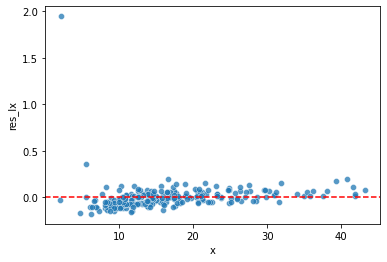

In [44]:
reg_lx = smf.ols('y ~ np.log(x)', data = df).fit()
tipo='FUNÇÃO LOGARITMO'
print(tipo.center(80))
print(reg_lx.summary())
df['res_lx'] = reg_lx.resid

sns.scatterplot(x = 'x', y = 'res_lx', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            FUNÇÃO POLINÔMIO 2º GRAU                            
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.06e-09
Time:                        15:53:09   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

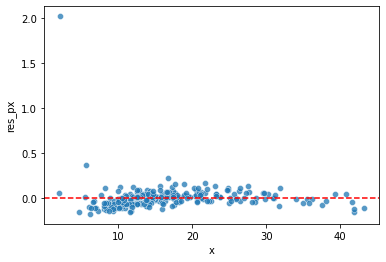

In [45]:
reg_px = smf.ols('y ~ x + np.power(x,2)', data = df).fit()
tipo='FUNÇÃO POLINÔMIO 2º GRAU'
print(tipo.center(80))
print(reg_px.summary())
df['res_px'] = reg_px.resid

sns.scatterplot(x = 'x', y = 'res_px', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```


                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 03 May 2022   Prob (F-statistic):           8.27e-16
Time:                        15:55:08   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

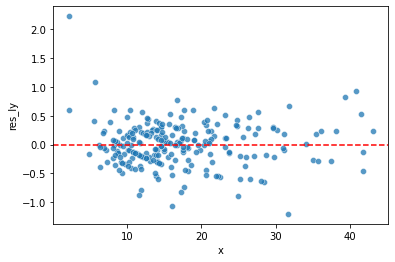

In [52]:
reg_ly = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg_ly.summary())
df['res_ly'] = reg_ly.resid

sns.scatterplot(x = 'x', y = 'res_ly', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

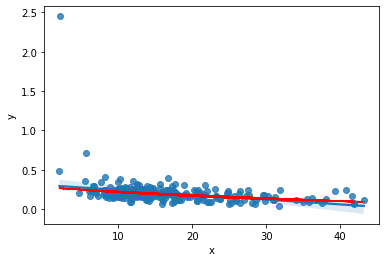

In [39]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], np.exp(reg_ly.fittedvalues), 'r,--')

In [48]:
df['pred'] = np.exp(reg_ly.fittedvalues)
r = df[['pred', 'y']].corr().iloc[0,1]
print(('R² log(y) = '),round(r**2,3))

R² log(y) =  0.114


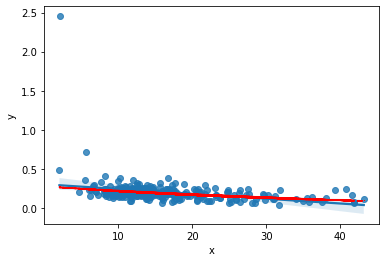

In [31]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], df['pred_y'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [53]:
df['pred_y'] = np.exp(reg_ly.fittedvalues)
r = df[['pred_y', 'y']].corr().iloc[0,1]
print(('R² log(y) = '),round(r**2,3))

R² log(y) =  0.114


###  6. qual modelo resultou no melhor ajuste?

In [56]:
# outra forma de calcular o R^2
df['pred'] = reg_n.fittedvalues
r = df[['pred', 'y']].corr().iloc[0,1]
print(('R² regressão normal = '),round(r**2,3))

R² regressão normal =  0.091


In [57]:
df['pred'] = reg_lx.fittedvalues
r = df[['pred', 'y']].corr().iloc[0,1]
print(('R² log(x) = '),round(r**2,3))

R² log(x) =  0.202


In [58]:
df['pred'] = reg_px.fittedvalues
r = df[['pred', 'y']].corr().iloc[0,1]
print(('R² polinômio de x = '),round(r**2,3))

R² polinômio de x =  0.158


In [54]:
df['pred_y'] = np.exp(reg_ly.fittedvalues)
r = df[['pred_y', 'y']].corr().iloc[0,1]
print(('R² log(y) = '),round(r**2,3))

R² log(y) =  0.114


### CONCLUSÃO
O modelo que apresentou melhor ajuste foi o log(x) com o R² = 20.2%